In [ ]:
# Import the required library to access Google Drive
from google.colab import drive

# Mount Google Drive to Colab so we can access files stored there
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
file_path = "/content/drive/MyDrive/question4-stock-data.csv"
df= pd.read_csv(file_path)

Data Exploration and Data Preprocessing

In [ ]:
df.dtypes


,0
Unnamed: 0,int64
Date,object
Adj Close,float64
Close,float64
High,float64
Low,float64
Open,float64
Volume,float64


In [ ]:
#drop unamed 0 and convert date column to datetime

import pandas as pd
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Drop 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)


In [ ]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0
...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0


In [ ]:
#checked how many datas for each month with year

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and month and count the number of data points
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

monthly_counts


,Year,Month,Count
0,1980.0,3.0,11
1,1980.0,4.0,21
2,1980.0,5.0,21
3,1980.0,6.0,21
4,1980.0,7.0,22
...,...,...,...
533,2024.0,8.0,22
534,2024.0,9.0,20
535,2024.0,10.0,23
536,2024.0,11.0,18


In [ ]:
#data counts by year count

import numpy as np

# Group by year and count the number of data points
yearly_counts = df.groupby('Year').size().reset_index(name='Count')

yearly_counts


,Year,Count
0,1980.0,198
1,1981.0,250
2,1982.0,252
3,1983.0,247
4,1984.0,250
5,1985.0,251
6,1986.0,250
7,1987.0,250
8,1988.0,253
9,1989.0,248


In [ ]:
#need to split data only for 20 years from last data
# because there were errors in columns and data in the older historical records.

import pandas as pd

# Find the last date in the dataset
last_date = df['Date'].max()

# Calculate the date 20 years before the last date
twenty_years_ago = last_date - pd.DateOffset(years=20)

# Filter the DataFrame to include only data from the last 20 years
df_last_20_years = df[df['Date'] >= twenty_years_ago]

# Now df_last_20_years contains only the data from the last 20 years
df_last_20_years


,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month
6255,2004-12-27,61.901367,80.150002,80.330002,79.709999,79.709999,182600.0,2004.0,12.0
6256,2004-12-28,62.055862,80.349998,80.470001,80.019997,80.150002,123500.0,2004.0,12.0
6257,2004-12-29,61.654243,79.830002,NaN,79.540001,80.120003,80200.0,2004.0,12.0
6258,2004-12-30,62.287544,80.650002,80.910004,80.279999,80.449997,96900.0,2004.0,12.0
6259,2004-12-31,63.229782,81.870003,81.870003,80.849998,80.849998,137200.0,2004.0,12.0
...,...,...,...,...,...,...,...,...,...
11286,2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700.0,2024.0,12.0
11287,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0,2024.0,12.0
11288,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0,2024.0,12.0
11289,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0,2024.0,12.0


Checking null values

In [ ]:
#check for null values for last 20 years data

# Check for null values in the last 20 years of data
null_counts = df_last_20_years.isnull().sum()
null_counts


,0
Date,0
Adj Close,39
Close,51
High,41
Low,56
Open,40
Volume,73
Year,0
Month,0


In [ ]:
#check volume ==0 data rows and remove them

# Check for rows where 'Volume' is equal to 0
volume_zero_rows = df_last_20_years[df_last_20_years['Volume'] == 0]

# Print the rows where 'Volume' is 0
volume_zero_rows


,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month


In [ ]:
# date , months data count

# Group by year and month and count the number of data points in the cleaned data
monthly_counts_cleaned = df_last_20_years.groupby(['Year', 'Month']).size().reset_index(name='Count')

monthly_counts_cleaned


,Year,Month,Count
0,2004.0,12.0,5
1,2005.0,1.0,20
2,2005.0,2.0,19
3,2005.0,3.0,21
4,2005.0,4.0,21
...,...,...,...
236,2024.0,8.0,22
237,2024.0,9.0,20
238,2024.0,10.0,23
239,2024.0,11.0,18


In [ ]:
#check for na values

# Check for null values in the last 20 years of data
null_counts = df_last_20_years.isnull().sum()
print(null_counts)

# Identify rows with NA values
rows_with_na = df_last_20_years[df_last_20_years.isnull().any(axis=1)]
rows_with_na


Date          0
Adj Close    39
Close        51
High         41
Low          56
Open         40
Volume       73
Year          0
Month         0
dtype: int64


,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month
6257,2004-12-29,61.654243,79.830002,NaN,79.540001,80.120003,80200.0,2004.0,12.0
6266,2005-01-11,NaN,80.820000,81.209999,80.320000,80.599998,182700.0,2005.0,1.0
6273,2005-01-21,60.866486,78.809998,NaN,78.599998,78.650002,197300.0,2005.0,1.0
6275,2005-01-25,60.047806,77.750000,77.949997,77.199997,77.500000,NaN,2005.0,1.0
6337,2005-04-25,57.194225,73.580002,73.669998,NaN,73.180000,170100.0,2005.0,4.0
...,...,...,...,...,...,...,...,...,...
11197,2024-08-15,181.789993,181.789993,NaN,180.770004,181.929993,693500.0,2024.0,8.0
11206,2024-08-28,187.669998,NaN,190.229996,187.139999,189.600006,366200.0,2024.0,8.0
11223,2024-09-23,185.399994,NaN,185.809998,184.130005,184.750000,357800.0,2024.0,9.0
11238,2024-10-14,175.100006,NaN,175.389999,174.080002,174.220001,316100.0,2024.0,10.0


In [ ]:
#check for duplicate rows

# Check for duplicate rows
duplicate_rows = df_last_20_years[df_last_20_years.duplicated()]

# Print the duplicate rows
duplicate_rows

,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month


In [ ]:
max_date = df_last_20_years.Date.max()
min_date = df_last_20_years.Date.min()
print("Latest Date:", max_date)
print("Earliest Date:", min_date)

Latest Date: 2024-12-27 00:00:00
Earliest Date: 2004-12-27 00:00:00


In [ ]:
print("Length of data date:", len(df_last_20_years['Date']))
print("Difference between Latest and Earliest date:", max_date- min_date)

Length of data date: 4998
Difference between Latest and Earliest date: 7305 days 00:00:00


In [ ]:
total_days = (max_date - min_date).days
weeks = total_days // 7
weekend = weeks * 2  # Total weekend days
hol = 11 * 5        # Total holidays (assuming 11 holidays per year)

# Convert weekend and holidays to Timedelta
weekend_timedelta = pd.Timedelta(days=weekend)
hol_timedelta = pd.Timedelta(days=hol)

# Calculate approximate days
approx_day = total_days - weekend - hol

print(f"Approximate days: {approx_day}")

Approximate days: 5164


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


# Convert your dataframe to datetime and set as index
df_last_20_years['Date'] = pd.to_datetime(df_last_20_years['Date'])
df_last_20_years.set_index('Date', inplace=True)

# Create a complete date range for business days only
start_date = df_last_20_years.index.min()
end_date = df_last_20_years.index.max()

# Generate a business day date range (Monday through Friday)
business_days = pd.date_range(start=start_date, end=end_date, freq='B')

# Find missing business days
existing_dates = set(df_last_20_years.index)
missing_business_days = [date for date in business_days if date not in existing_dates]

print(f"Identified {len(missing_business_days)} missing business days")

# Create a DataFrame with all business days
full_business_df = pd.DataFrame(index=business_days)
full_business_df = full_business_df.join(df_last_20_years)

# Step 1: Fill forward Adj Close, High, Low, and Volume for missing dates
full_business_df['Adj Close'] = full_business_df['Adj Close'].ffill()
full_business_df['High'] = full_business_df['High'].ffill()
full_business_df['Low'] = full_business_df['Low'].ffill()
full_business_df['Volume'] = full_business_df['Volume'].ffill()

# Step 2: Process the Open and Close prices
# For each pair of consecutive dates in the original data
for i in range(len(df_last_20_years.index) - 1):
    current_date = df_last_20_years.index[i]
    next_date = df_last_20_years.index[i + 1]

    # Check if dates are consecutive business days
    if (next_date - current_date).days > 1:
        # Get all business days between these two dates
        between_dates = pd.date_range(start=current_date + timedelta(days=1),
                                     end=next_date - timedelta(days=1),
                                     freq='B')

        # For each missing day between
        for j, missing_date in enumerate(between_dates):
            if missing_date in full_business_df.index:
                if j == 0:
                    # First missing day after current_date
                    # Open price = close price of current_date
                    full_business_df.loc[missing_date, 'Open'] = df_last_20_years.loc[current_date, 'Close']
                else:
                    # Open price = close price of previous missing day
                    prev_missing = between_dates[j-1]
                    if prev_missing in full_business_df.index:
                        full_business_df.loc[missing_date, 'Open'] = full_business_df.loc[prev_missing, 'Close']

                if j == len(between_dates) - 1:
                    # Last missing day before next_date
                    # Close price = open price of next_date
                    full_business_df.loc[missing_date, 'Close'] = df_last_20_years.loc[next_date, 'Open']
                else:
                    # Close price = open price of next missing day
                    next_missing = between_dates[j+1]
                    if next_missing in full_business_df.index:
                        full_business_df.loc[missing_date, 'Close'] = full_business_df.loc[next_missing, 'Open']

# Fill any remaining gaps
# For remaining missing Close prices, set to the same day's Open
mask = pd.isna(full_business_df['Close']) & ~pd.isna(full_business_df['Open'])
full_business_df.loc[mask, 'Close'] = full_business_df.loc[mask, 'Open']

# For remaining missing Open prices, set to the previous day's Close
full_business_df['Open'] = full_business_df['Open'].fillna(full_business_df['Close'].shift(1))

# Handle the first day's Open if it's still NaN
if pd.isna(full_business_df['Open'].iloc[0]) and not pd.isna(full_business_df['Close'].iloc[0]):
    full_business_df['Open'].iloc[0] = full_business_df['Close'].iloc[0]

# Final forward fill for any remaining NaN values
full_business_df = full_business_df.ffill()

# Reset index to make Date a column again
full_business_df.reset_index(inplace=True)
full_business_df.rename(columns={'index': 'Date'}, inplace=True)

# Verify the number of rows
print(f"Original dataset had {len(df_last_20_years)} rows")
print(f"Filled dataset has {len(full_business_df)} rows")
print(f"Added {len(full_business_df) - len(df_last_20_years)} missing business days")

# Display the filled dataframe
print(full_business_df.head())
print("...")
print(full_business_df.tail())


Identified 222 missing business days


<ipython-input-114-6b753b8b1bac>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Original dataset had 4998 rows
Filled dataset has 5220 rows
Added 222 missing business days
        Date  Adj Close      Close       High        Low       Open    Volume  \
0 2004-12-27  61.901367  80.150002  80.330002  79.709999  79.709999  182600.0   
1 2004-12-28  62.055862  80.349998  80.470001  80.019997  80.150002  123500.0   
2 2004-12-29  61.654243  79.830002  80.470001  79.540001  80.120003   80200.0   
3 2004-12-30  62.287544  80.650002  80.910004  80.279999  80.449997   96900.0   
4 2004-12-31  63.229782  81.870003  81.870003  80.849998  80.849998  137200.0   

     Year  Month  
0  2004.0   12.0  
1  2004.0   12.0  
2  2004.0   12.0  
3  2004.0   12.0  
4  2004.0   12.0  
...
           Date   Adj Close       Close        High         Low        Open  \
5215 2024-12-23  180.449997  180.449997  180.619995  177.970001  179.119995   
5216 2024-12-24  181.429993  181.429993  181.720001  180.830002  181.000000   
5217 2024-12-25  181.429993  195.970001  181.720001  180.830002  1

In [ ]:
#check for na values

# Check for null values in the final dataframe
null_counts_final = full_business_df.isnull().sum()
null_counts_final


,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0
Year,0
Month,0


In [ ]:
df_cleaned=full_business_df.copy()

In [ ]:
df_cleaned

,Date,Adj Close,Close,High,Low,Open,Volume,Year,Month
0,2004-12-27,61.901367,80.150002,80.330002,79.709999,79.709999,182600.0,2004.0,12.0
1,2004-12-28,62.055862,80.349998,80.470001,80.019997,80.150002,123500.0,2004.0,12.0
2,2004-12-29,61.654243,79.830002,80.470001,79.540001,80.120003,80200.0,2004.0,12.0
3,2004-12-30,62.287544,80.650002,80.910004,80.279999,80.449997,96900.0,2004.0,12.0
4,2004-12-31,63.229782,81.870003,81.870003,80.849998,80.849998,137200.0,2004.0,12.0
...,...,...,...,...,...,...,...,...,...
5215,2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700.0,2024.0,12.0
5216,2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600.0,2024.0,12.0
5217,2024-12-25,181.429993,195.970001,181.720001,180.830002,181.429993,168600.0,2024.0,12.0
5218,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200.0,2024.0,12.0


Data Visualization

In [ ]:
#line chart denoting all features

import plotly.graph_objects as go


fig = go.Figure(data=[go.Candlestick(x=df_cleaned['Date'],
                open=df_cleaned['Open'],
                high=df_cleaned['High'],
                low=df_cleaned['Low'],
                close=df_cleaned['Close'])])

fig.update_layout(
    title='Stock Price with Date',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

fig.show()

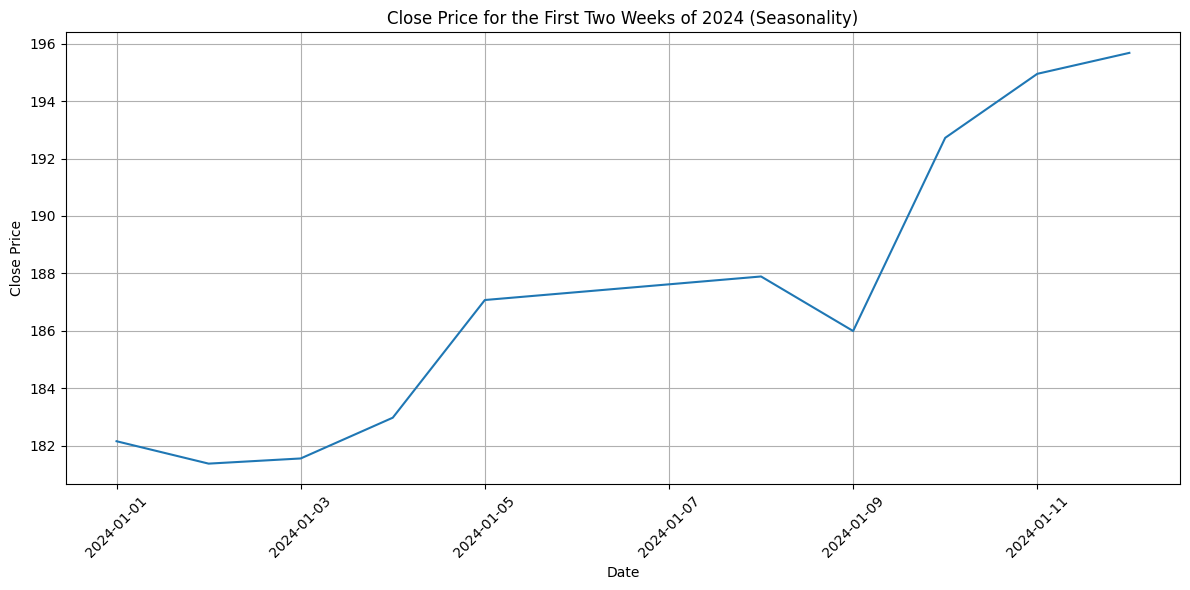

In [ ]:
# prompt: i need plot for 2 weeks in 2024 to find the seasonality(first reset the index)

import pandas as pd
import matplotlib.pyplot as plt
# Filter data for the first two weeks of 2024
start_date_2024 = pd.to_datetime('2024-01-01')
end_date_2024 = start_date_2024 + timedelta(weeks=2)

df_2weeks_2024 = df_cleaned[(df_cleaned['Date'] >= start_date_2024) & (df_cleaned['Date'] < end_date_2024)].copy()



# Plotting the seasonality for the two weeks
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2weeks_2024, x='Date', y='Close')
plt.title('Close Price for the First Two Weeks of 2024 (Seasonality)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#only the close value and index line chart

# Assuming df_cleaned is your DataFrame as in the previous code
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(x=df_cleaned.index, y=df_cleaned['Close'])])

fig.update_layout(
    title='Close Price over Time',
    xaxis_title='Date',
    yaxis_title='Close Price'
)

fig.show()


Data Splitting

In [ ]:
# Define features (X) and target variable (y)

X = df_cleaned.drop(columns=['Close','Month','Year'])  # Features
y = df_cleaned['Close']  # Target variable

# Compute the split point (80% training, 20% testing)
split_point = int(len(X) * 0.8)

# Train-Test Split (Sequential, without shuffling)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (4176, 5)
X_test shape: (1044, 5)
y_train shape: (4176,)
y_test shape: (1044,)


In [ ]:
X_train

,Adj Close,High,Low,Open,Volume
Date,,,,,
2004-12-27,61.901367,80.330002,79.709999,79.709999,182600.0
2004-12-28,62.055862,80.470001,80.019997,80.150002,123500.0
2004-12-29,61.654243,80.470001,79.540001,80.120003,80200.0
2004-12-30,62.287544,80.910004,80.279999,80.449997,96900.0
2004-12-31,63.229782,81.870003,80.849998,80.849998,137200.0
...,...,...,...,...,...
2020-12-22,150.770004,151.750000,150.220001,151.449997,181800.0
2020-12-23,151.160004,151.350006,150.199997,150.639999,317900.0
2020-12-24,150.470001,151.130005,150.179993,151.160004,150200.0


In [ ]:
print(X_train.dtypes)


Adj Close    float64
High         float64
Low          float64
Open         float64
Volume       float64
dtype: object


##Model Training and Evaluation

In [ ]:
#Tests for Stationarity: Perform the Augmented Dickey-Fuller (ADF) test or Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.

from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_cleaned['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# KPSS Test
result = kpss(df_cleaned['Close'])
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.117614
p-value: 0.707997
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567

KPSS Statistic: 7.672319
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-126-bc403757c4b0>:14: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [ ]:
#The time series is not stationary and requires transformation (e.g., differencing).

# Calculate the first difference of the 'Close' price
df_cleaned['Close_diff'] = df_cleaned['Close'].diff()

# Drop the first row, which will have a NaN value after differencing
df_cleaned = df_cleaned.dropna()

# ADF Test on the differenced series
result = adfuller(df_cleaned['Close_diff'])
print('ADF Statistic (Differenced Series): %f' % result[0])
print('p-value (Differenced Series): %f' % result[1])
print('Critical Values (Differenced Series):')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# KPSS Test on the differenced series
result = kpss(df_cleaned['Close_diff'])
print('\nKPSS Statistic (Differenced Series): %f' % result[0])
print('p-value (Differenced Series): %f' % result[1])
print('Critical Values (Differenced Series):')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic (Differenced Series): -24.655649
p-value (Differenced Series): 0.000000
Critical Values (Differenced Series):
	1%: -3.432
	5%: -2.862
	10%: -2.567

KPSS Statistic (Differenced Series): 0.059956
p-value (Differenced Series): 0.100000
Critical Values (Differenced Series):
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


<ipython-input-127-5aec7676fbb0>:18: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




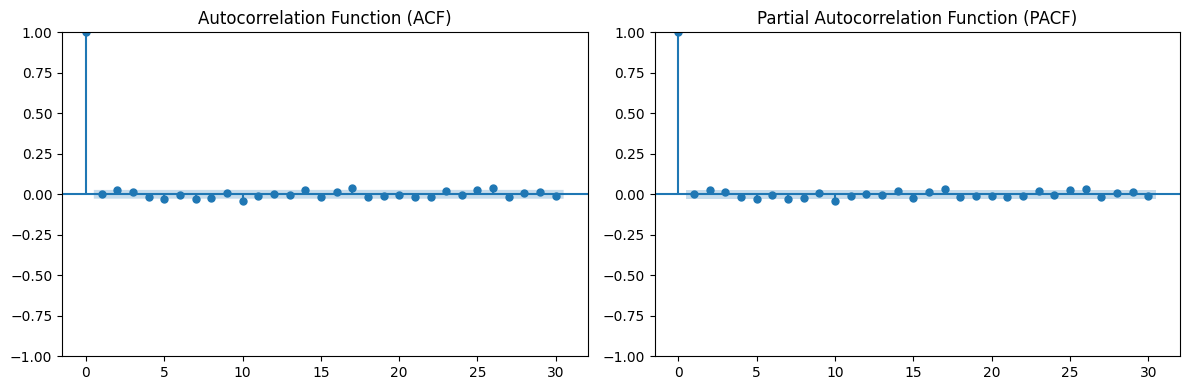

In [ ]:
#ACF and PACF Plots: Examine autocorrelation and partial autocorrelation to identify ARIMA parameters (p, d, q) and SARIMA parameters (P, D, Q, s). for differenced series

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df_cleaned['Close_diff'], lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df_cleaned['Close_diff'], lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


In [ ]:
#seasonal differencing to remove seasonal patterns

# Seasonal differencing with a lag of 5 (example, adjust as needed based on your data's seasonality)
df_cleaned['Seasonal_Diff'] = df_cleaned['Close'] - df_cleaned['Close'].shift(5)

# Drop rows with NaN values introduced by the differencing
df_cleaned = df_cleaned.dropna()

# Now df_cleaned['Seasonal_Diff'] contains the seasonally differenced data.

# ADF Test on the seasonally differenced series
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_cleaned['Seasonal_Diff'])
print('ADF Statistic (Seasonally Differenced Series): %f' % result[0])
print('p-value (Seasonally Differenced Series): %f' % result[1])
print('Critical Values (Seasonally Differenced Series):')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic (Seasonally Differenced Series): -11.634958
p-value (Seasonally Differenced Series): 0.000000
Critical Values (Seasonally Differenced Series):
	1%: -3.432
	5%: -2.862
	10%: -2.567


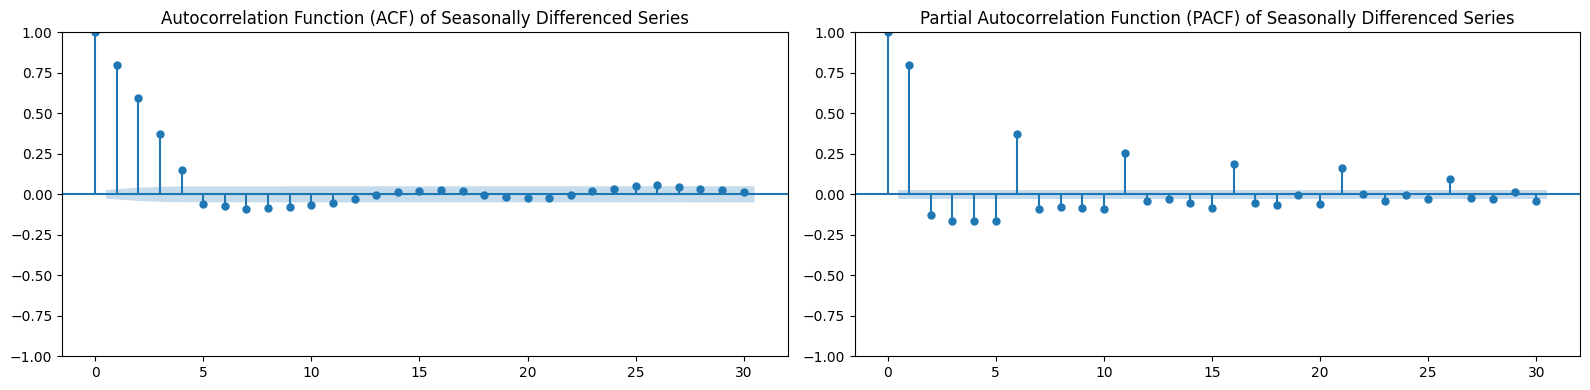

In [ ]:
# ACF and PACF to seasonally differenced series

import matplotlib.pyplot as plt
# Assuming df_cleaned and 'Seasonal_Diff' are defined as in the previous code

# ACF and PACF plots for the seasonally differenced series
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

plot_acf(df_cleaned['Seasonal_Diff'], lags=30, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) of Seasonally Differenced Series')

plot_pacf(df_cleaned['Seasonal_Diff'], lags=30, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF) of Seasonally Differenced Series')

plt.tight_layout()
plt.show()


ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5209
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -10470.317
Date:                Wed, 14 May 2025   AIC                          20942.634
Time:                        04:29:44   BIC                          20949.192
Sample:                    01-11-2005   HQIC                         20944.927
                         - 12-27-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.2641      0.031    106.097      0.000       3.204       3.324
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              9585.86
Prob(Q):                              0.90   Pr

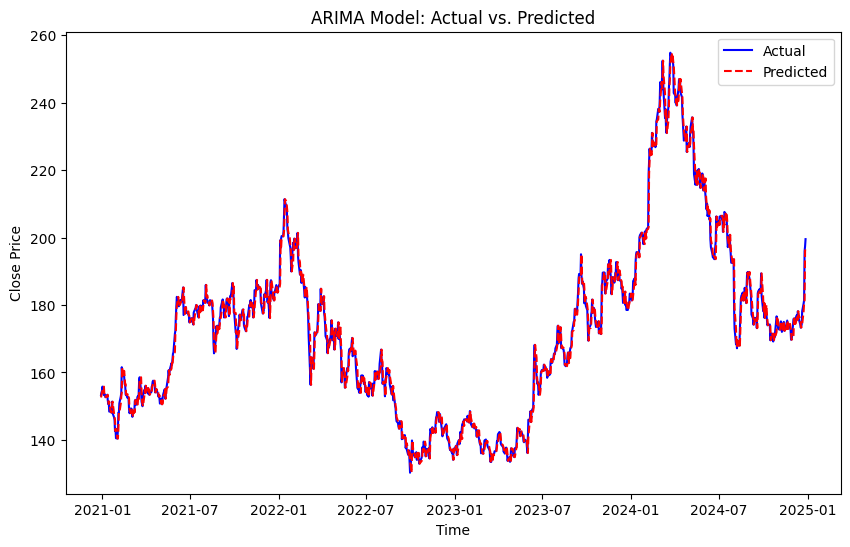

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure the time series is stationary and cleaned
close_prices = df_cleaned['Close']  # Ensure df_cleaned['Close'] is properly preprocessed

# Fit ARIMA model
model = ARIMA(close_prices, order=(0, 1, 0))  # Replace with your determined (p, d, q)
model_fit = model.fit()

# Summary for diagnostics
print(model_fit.summary())

# Make predictions (in-sample for y_test range)
predictions = model_fit.predict(start=len(close_prices) - len(y_test), end=len(close_prices) - 1)

# Evaluate the model
arima_rmse = np.sqrt(mean_squared_error(y_test, predictions))
arima_mae = mean_absolute_error(y_test, predictions)
arima_mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100  # Percentage error
arima_r2 = r2_score(y_test, predictions)

# Print metrics
print("ARIMA RMSE:", arima_rmse)
print("ARIMA MAE:", arima_mae)
print("ARIMA MAPE:", arima_mape, "%")
print("ARIMA R-squared:", arima_r2)

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(y_test.index, y_test.values, label="Actual", color="blue")
plt.plot(y_test.index, predictions, label="Predicted", color="red", linestyle="--")
plt.title("ARIMA Model: Actual vs. Predicted")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()


SARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



SARIMA RMSE: 3.3186561348912704
SARIMA R-squared: 0.983799973994585
SARIMA MAE: 2.4704831178995486
SARIMA MAPE: 1.4174805547896352 %


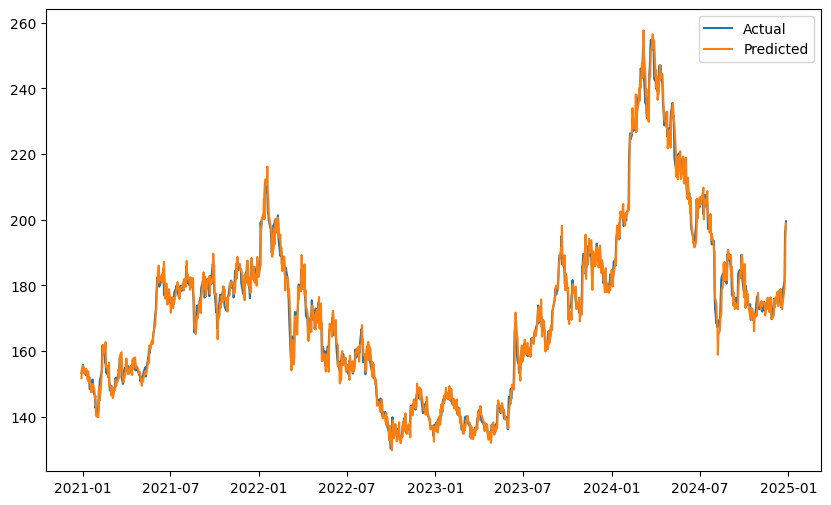

In [ ]:
#code for SARIMA MODel

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX



# Fit the SARIMA model
model = SARIMAX(close_prices, order=(1, 1, 0), seasonal_order=(1, 1, 0, 5)) # Replace with your determined orders
model_fit = model.fit()

# Make predictions
SARIMA_predictions = model_fit.predict(start=len(close_prices) - len(X_test), end=len(close_prices) - 1)

# Evaluate the model
sarima_rmse = np.sqrt(mean_squared_error(y_test, SARIMA_predictions))
print("SARIMA RMSE:", sarima_rmse)

sarima_r2 = r2_score(y_test, SARIMA_predictions)
print("SARIMA R-squared:", sarima_r2)

sarima_mae = mean_absolute_error(y_test, SARIMA_predictions)
sarima_mape = np.mean(np.abs((y_test - SARIMA_predictions) / y_test)) * 100  # Percentage error
print("SARIMA MAE:", sarima_mae)
print("SARIMA MAPE:", sarima_mape, "%")

#Further analysis:
# Plot predictions vs. actual
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, SARIMA_predictions, label='Predicted')
plt.legend()
plt.show()




In [ ]:
#ARIMA predictions y_test table

import pandas as pd
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'ARIMA Predicted': predictions,'SARIMA Predicted': SARIMA_predictions})

# Display the DataFrame
comparison_df


,Actual,ARIMA Predicted,SARIMA Predicted
2020-12-29,153.339996,152.600006,151.728318
2020-12-30,154.089996,153.339996,154.651213
2020-12-31,154.570007,154.089996,153.514798
2021-01-01,155.809998,154.570007,155.482523
2021-01-04,153.289993,155.809998,154.573207
...,...,...,...
2024-12-23,180.449997,178.169998,177.898251
2024-12-24,181.429993,180.449997,179.333412
2024-12-25,195.970001,181.429993,182.817483
2024-12-26,197.360001,195.970001,195.735271


In [ ]:
#plot arima_preditions,SARIMA_predictions and actuat test

import plotly.graph_objects as go

# Create traces for actual, ARIMA, and SARIMA predictions
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name='Actual Test'))
fig.add_trace(go.Scatter(x=y_test.index, y=predictions, mode='lines', name='ARIMA Predictions'))
fig.add_trace(go.Scatter(x=y_test.index, y=SARIMA_predictions, mode='lines', name='SARIMA Predictions'))

# Update layout for better visualization
fig.update_layout(
    title='Stock Price Predictions',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig.show()
